<a href="https://colab.research.google.com/github/Itskindastrange/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [6]:
import zipfile
import os

zip_file_path = '/content/mall customers.zip'
extract_to_path = 'content'

os.makedirs(extract_to_path, exist_ok=True)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f'Files have been extracted to {extract_to_path}')


Files have been extracted to content


In [9]:
df = pd.read_csv('/content/content/Mall_Customers.csv')

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [19]:
df.drop(['CustomerID','Gender','Age'],axis=1,inplace=True)

In [21]:
df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

In [22]:
df.tail()

,Annual_Income,Spending_Score
195,120,79
196,126,28
197,126,74
198,137,18
199,137,83


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

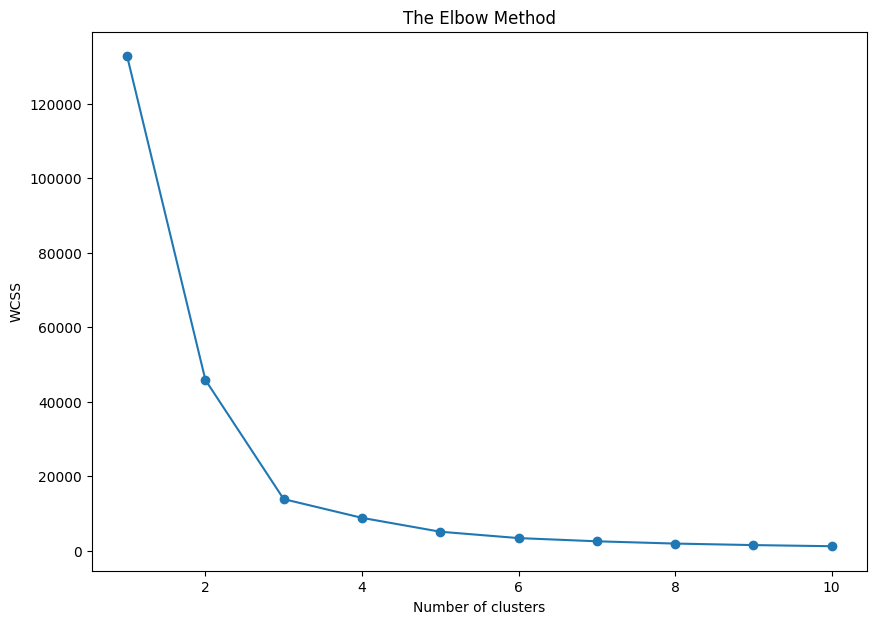

In [38]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(df.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(df.iloc[:, 1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


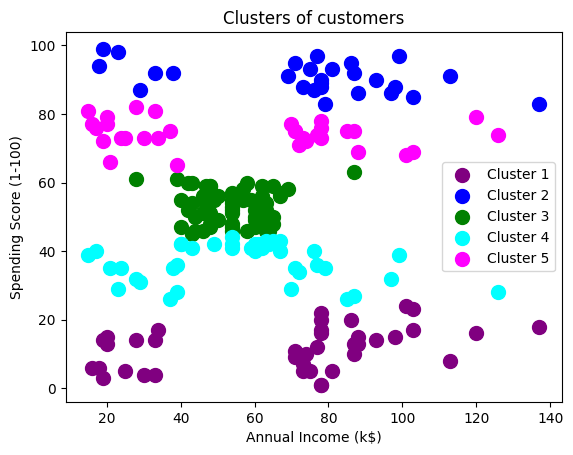

In [52]:

plt.scatter(df.loc[y_kmeans == 0, 'Annual_Income'], df.loc[y_kmeans == 0, 'Spending_Score'], s=100, c='purple', label='Cluster 1')
plt.scatter(df.loc[y_kmeans == 1, 'Annual_Income'], df.loc[y_kmeans == 1, 'Spending_Score'], s=100, c='blue', label='Cluster 2')
plt.scatter(df.loc[y_kmeans == 2, 'Annual_Income'], df.loc[y_kmeans == 2, 'Spending_Score'], s=100, c='green', label='Cluster 3')
plt.scatter(df.loc[y_kmeans == 3, 'Annual_Income'], df.loc[y_kmeans == 3, 'Spending_Score'], s=100, c='cyan', label='Cluster 4')
plt.scatter(df.loc[y_kmeans == 4, 'Annual_Income'], df.loc[y_kmeans == 4, 'Spending_Score'], s=100, c='magenta', label='Cluster 5')



plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
